In [39]:
import pandas as pd
import numpy as np
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [169]:
df = pd.read_csv('https://raw.githubusercontent.com/fazlyrabbi77/Climate-Science/master/Dhaka%20weather%201953-2016.csv')

In [170]:
df

,YEAR,Month,MaxTemp,MinTemp,RelativeHumidity,Rainfall
0,1953,1,26.70,10.9,70,10.0
1,1953,2,33.60,14.7,65,2.0
2,1953,3,37.50,21.7,73,90.0
3,1953,4,37.70,23.4,69,90.0
4,1953,5,34.70,24.2,81,274.0
...,...,...,...,...,...,...
763,2016,8,33.28,26.8,78,169.9
764,2016,9,32.87,26.6,82,138.5
765,2016,10,33.07,25.2,75,76.6
766,2016,11,29.60,20.2,73,24.1


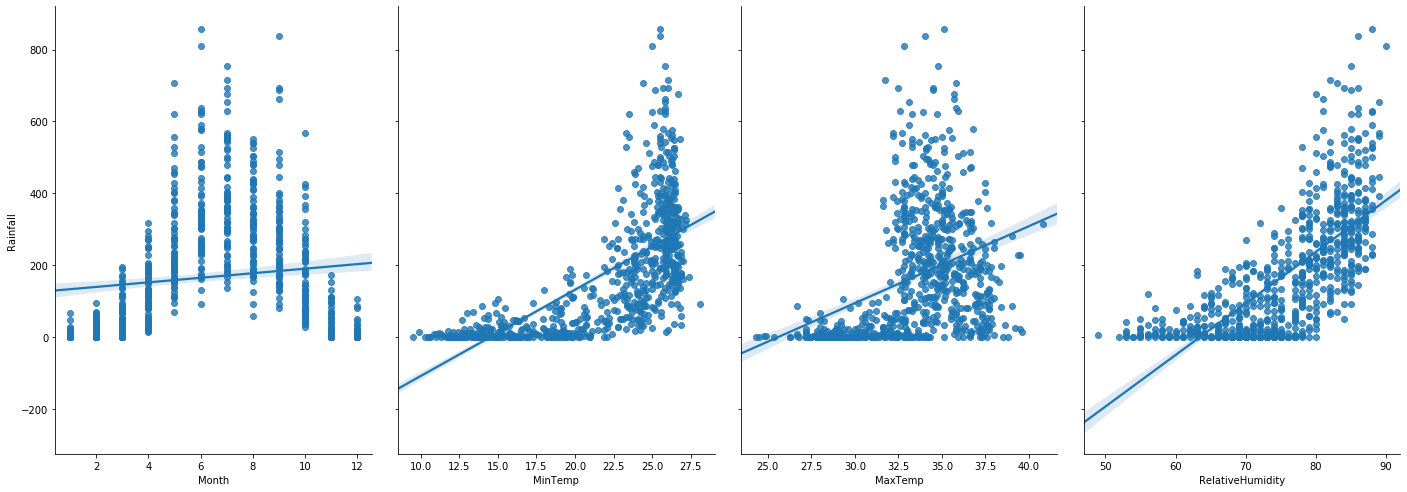

In [171]:
sns.pairplot(df, x_vars=['Month','MinTemp','MaxTemp','RelativeHumidity'], y_vars='Rainfall', height=7, aspect=0.7, kind='reg')

In [172]:
x = df[['Month','MinTemp','MaxTemp','RelativeHumidity']]
y = df['Rainfall']

In [173]:
from sklearn.preprocessing import PolynomialFeatures

In [174]:
poly = PolynomialFeatures(degree=12)
x_ = poly.fit_transform(x)
x_test_ = poly.fit_transform(x_test)

In [175]:
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(x_, y)

# Obtain coefficients
lg.coef_

array([-2.06822181e-10,  8.26000628e-10,  2.37746125e-09, ...,
       -9.64904321e-11,  6.35325476e-12, -1.18817066e-13])

In [176]:
#defining prediction data frame 
predictions1 = lg.predict(x_test_)

In [177]:
predictions1

array([ 5.52341471e+01,  8.51851969e+01,  3.04547135e+02,  7.35719401e+00,
        3.27191667e+02,  3.49379167e+02, -2.40715169e+01,  2.71469010e+02,
        1.34174089e+02,  7.44355876e+00,  5.66490495e+02,  1.45787516e+01,
        3.71496354e+02,  9.82936198e+00,  1.88908854e+01,  1.13681413e+02,
        2.72168229e+02,  2.20119401e+02,  1.17335612e+00,  2.95392839e+02,
        2.21241862e+00,  4.86318620e+02,  2.29293229e+02,  1.48883073e+02,
        4.51564714e+02,  3.67939616e+01,  2.41445573e+02,  2.90478776e+02,
        3.11554948e+02,  3.33178874e+01,  2.32959147e+01,  5.32634440e+01,
        1.42623307e+02,  3.47658464e+02,  3.64090104e+02,  5.48396745e+02,
        4.03502214e+02,  2.43236589e+02,  6.21290690e+00,  1.99871354e+02,
        3.80778971e+01,  3.44477702e+01,  8.78850260e+01,  5.07883464e+01,
        2.98822526e+02,  1.45180216e+01,  4.28185807e+02,  3.64161784e+00,
        2.29519792e+02, -4.49055990e-02,  4.01916667e+01,  2.31211198e+02,
        5.50732682e+02,  

In [178]:
x_

array([[1.00000000e+00, 1.00000000e+00, 1.09000000e+01, ...,
        2.01373780e+21, 5.27946240e+21, 1.38412872e+22],
       [1.00000000e+00, 2.00000000e+00, 1.47000000e+01, ...,
        1.51988987e+21, 2.94026315e+21, 5.68800906e+21],
       [1.00000000e+00, 3.00000000e+00, 2.17000000e+01, ...,
        6.04353632e+21, 1.17647507e+22, 2.29020480e+22],
       ...,
       [1.00000000e+00, 1.00000000e+01, 2.52000000e+01, ...,
        6.15858619e+21, 1.39671595e+22, 3.16763520e+22],
       [1.00000000e+00, 1.10000000e+01, 2.02000000e+01, ...,
        3.76540785e+21, 9.28630989e+21, 2.29020480e+22],
       [1.00000000e+00, 1.20000000e+01, 1.70000000e+01, ...,
        2.88304180e+21, 7.48032467e+21, 1.94084100e+22]])

In [179]:
#model performance
print('Coefficients:', lg.coef_)
print('Intercept:', lg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
accuracy = lg.score(x_test_,y_test)
print('AccuracyII:',accuracy*100,'%')

Coefficients: [-2.06822181e-10  8.26000628e-10  2.37746125e-09 ... -9.64904321e-11
  6.35325476e-12 -1.18817066e-13]
Intercept: 153.90065104166666
MAE: 40.261597834693056
MSE: 4334.130856336827
RMSE: 65.83411620381052
AccuracyII: 84.57115734256364 %


In [180]:
x_test_1 = poly.fit_transform(x_test)

C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\regression.py:279: RuntimeWarning: divide by zero encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\regression.py:282: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
C:\Users\Hp\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


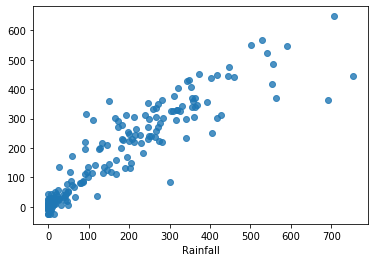

In [185]:
sns.regplot(y_test,predictions1, data=df, logx=True, truncate=True)

In [198]:
new_observation1 = [[1,13,19,77]]

In [199]:
x_test_1 = poly.fit_transform(new_observation1)

In [200]:
lg.predict(x_test_1)

array([-8068738.92332357])